In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import pandas as pd
import scipy

plt.close('all')

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

'/Users/nicholasbachand/Documents/Research/InteriorModeling'

In [58]:
resultsTime = "20240311-111046"
outputs = pd.read_csv(f'{home_dir}/resultsMC/outputs_{resultsTime}.csv', header=[0, 1], index_col=0)
inputs = pd.read_csv(f'{home_dir}/resultsMC/inputs_{resultsTime}.csv', index_col=0)
display(inputs, outputs)


,floorTempAdjustment,hInterior,hExterior,alphaRoof,material_type,windSpeed,wallRoughness
0,-3.481211,1.027987,1.769238,0.730551,Light,0.036991,1.528418
1,-3.394832,2.583749,17.829122,0.856819,Light,5.326817,2.128865
2,-2.761033,1.947124,2.971560,0.842989,Medium,0.120453,1.303572
3,-1.876235,1.835138,8.075970,0.714130,Medium,2.050852,2.097118
4,-1.657474,1.743795,13.956509,0.884858,Light,3.921743,2.033708
...,...,...,...,...,...,...,...
95,-2.594295,2.536172,2.944046,0.876732,Heavy,0.472745,1.472870
96,-2.789015,2.102238,10.435035,0.659530,Heavy,3.410245,1.739784
97,-2.332345,2.855610,7.918749,0.764473,Medium,2.148871,1.926508
98,-2.031749,2.481105,8.849676,0.831743,Heavy,3.560310,1.321407


day_1                                                    \
   ceilingMinusFloor outMinusFloor intWallMinusFloor extWallMinusFloor   
0           3.648370      1.958565         -2.175736         -0.891997   
1           2.430187      1.835271         -0.908705          0.728659   
2           0.992439      0.549458         -0.412566         -0.452213   
3           1.159606      0.617725         -0.663532         -0.322894   
4           2.692288      1.564066         -1.626471         -0.097884   
..               ...           ...               ...               ...   
95          1.312270      0.181691         -1.733286         -1.185071   
96          1.364994      0.207959         -1.941310         -0.942376   
97          1.023370      0.584355         -0.520677         -0.215444   
98          0.600066      0.193779         -0.911259          0.060679   
99          1.556406      0.278132         -2.039903         -1.139190   

               day_2                                                    \
   ceilingMinusFloor outMinusFloor intWallMinusFloor extWallMinusFloor   
0           4.018939      2.055558         -2.471313         -1.195652   
1           2.395958      1.440295         -1.359400         -0.025696   
2           0.981518      0.546138         -0.368669         -0.487928   
3           1.208886      0.636364         -0.676938         -0.372585   
4           2.384422      1.354692         -1.545585         -0.071936   
..               ...           ...               ...               ...   
95          1.351523      0.347742         -1.467422         -0.991637   
96          1.342002      0.313649         -1.619755         -0.875469   
97          0.931883      0.584394         -0.439821         -0.017480   
98          1.721381      0.372940         -2.092567         -1.187611   
99          1.775170      0.400918         -2.053953         -1.323185   

               day_3                                                    
   ceilingMinusFloor outMinusFloor intWallMinusFloor extWallMinusFloor  
0           4.405486      1.468748         -3.812023         -2.411974  
1           2.045491      1.141459         -1.222169         -0.288564  
2           1.051070      0.615601         -0.371328         -0.430004  
3           1.306448      0.641850         -0.790852         -0.504056  
4           2.370484      1.365027         -1.492312         -0.059142  
..               ...           ...               ...               ...  
95          2.159703      0.477070         -2.399689         -1.771737  
96          0.924615      0.390407         -0.948394         -0.134010  
97          1.280243      0.539183         -0.862795         -0.702954  
98          1.663845      0.359906         -1.851618         -1.394542  
99          1.867467      0.449476         -2.029270         -1.445748  

[100 rows x 12 columns]

In [59]:
dfFull = pd.DataFrame()
for day in range(1,4):
    df = pd.concat([inputs, outputs[f"day_{day}"][["ceilingMinusFloor", "outMinusFloor", "intWallMinusFloor", "extWallMinusFloor"]]], axis=1)
    df["day"] = day
    dfFull = pd.concat([dfFull, df], axis = "index")

dfFull = dfFull.reset_index(drop=True)
dfFull

,floorTempAdjustment,hInterior,hExterior,alphaRoof,material_type,windSpeed,wallRoughness,ceilingMinusFloor,outMinusFloor,intWallMinusFloor,extWallMinusFloor,day
0,-3.481211,1.027987,1.769238,0.730551,Light,0.036991,1.528418,3.648370,1.958565,-2.175736,-0.891997,1
1,-3.394832,2.583749,17.829122,0.856819,Light,5.326817,2.128865,2.430187,1.835271,-0.908705,0.728659,1
2,-2.761033,1.947124,2.971560,0.842989,Medium,0.120453,1.303572,0.992439,0.549458,-0.412566,-0.452213,1
3,-1.876235,1.835138,8.075970,0.714130,Medium,2.050852,2.097118,1.159606,0.617725,-0.663532,-0.322894,1
4,-1.657474,1.743795,13.956509,0.884858,Light,3.921743,2.033708,2.692288,1.564066,-1.626471,-0.097884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,-2.594295,2.536172,2.944046,0.876732,Heavy,0.472745,1.472870,2.159703,0.477070,-2.399689,-1.771737,3
296,-2.789015,2.102238,10.435035,0.659530,Heavy,3.410245,1.739784,0.924615,0.390407,-0.948394,-0.134010,3
297,-2.332345,2.855610,7.918749,0.764473,Medium,2.148871,1.926508,1.280243,0.539183,-0.862795,-0.702954,3
298,-2.031749,2.481105,8.849676,0.831743,Heavy,3.560310,1.321407,1.663845,0.359906,-1.851618,-1.394542,3


In [60]:
dropCondition = dfFull["ceilingMinusFloor"] > 10
dfFull = dfFull[~dropCondition]

In [61]:
def ventRi(delT, V, H = 3):
    g = 10
    Tref = 288.15
    return g * delT / Tref * H / V**2

dfFull.loc[:, "Ri"] = ventRi(dfFull["ceilingMinusFloor"], dfFull["windSpeed"])
dfFull.loc[:, "logRi"] = np.log(dfFull["Ri"])
dfFull

/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_24126/1487544632.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_24126/1487544632.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,floorTempAdjustment,hInterior,hExterior,alphaRoof,material_type,windSpeed,wallRoughness,ceilingMinusFloor,outMinusFloor,intWallMinusFloor,extWallMinusFloor,day,Ri,logRi
0,-3.481211,1.027987,1.769238,0.730551,Light,0.036991,1.528418,3.648370,1.958565,-2.175736,-0.891997,1,277.598608,5.626176
1,-3.394832,2.583749,17.829122,0.856819,Light,5.326817,2.128865,2.430187,1.835271,-0.908705,0.728659,1,0.008917,-4.719823
2,-2.761033,1.947124,2.971560,0.842989,Medium,0.120453,1.303572,0.992439,0.549458,-0.412566,-0.452213,1,7.121498,1.963118
3,-1.876235,1.835138,8.075970,0.714130,Medium,2.050852,2.097118,1.159606,0.617725,-0.663532,-0.322894,1,0.028704,-3.550715
4,-1.657474,1.743795,13.956509,0.884858,Light,3.921743,2.033708,2.692288,1.564066,-1.626471,-0.097884,1,0.018225,-4.004965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-2.594295,2.536172,2.944046,0.876732,Heavy,0.472745,1.472870,2.159703,0.477070,-2.399689,-1.771737,3,1.006105,0.006086
296,-2.789015,2.102238,10.435035,0.659530,Heavy,3.410245,1.739784,0.924615,0.390407,-0.948394,-0.134010,3,0.008277,-4.794230
297,-2.332345,2.855610,7.918749,0.764473,Medium,2.148871,1.926508,1.280243,0.539183,-0.862795,-0.702954,3,0.028865,-3.545119
298,-2.031749,2.481105,8.849676,0.831743,Heavy,3.560310,1.321407,1.663845,0.359906,-1.851618,-1.394542,3,0.013666,-4.292848


In [62]:
qois = ["ceilingMinusFloor", "outMinusFloor", "intWallMinusFloor", "extWallMinusFloor"]
fig = px.histogram(
    dfFull,
    x = qois,
    marginal="box", # or violin, rug
    barmode = "group"
    )
fig.show()

fig = px.line(dfFull, y = qois)
fig.show()


In [96]:
fig = px.scatter(dfFull, x="floorTempAdjustment", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="hInterior", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="alphaRoof", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="day", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="windSpeed", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="wallRoughness", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="hExterior", y=qois, facet_col="material_type", trendline="ols")
fig.show()
fig = px.scatter(dfFull, x="logRi", y=qois, facet_col="material_type", trendline="ols")
fig.show()

In [95]:
fig = px.scatter(dfFull, x="windSpeed", y="logRi", symbol="material_type")
fig.show()
fig = px.scatter(dfFull.loc[dfFull["windSpeed"] >= 2], x="windSpeed", y="Ri", symbol="material_type")
fig.show()

In [101]:
fig = px.scatter_3d(dfFull, x="outMinusFloor", y="ceilingMinusFloor", z="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type", size = "windSpeed")
fig.show()

# fig = px.scatter(dfFull, x="outMinusFloor", y="ceilingMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()
# fig = px.scatter(dfFull, x="outMinusFloor", y="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()
# fig = px.scatter(dfFull, x="ceilingMinusFloor", y="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()

In [65]:
qoiX = dfFull[qois]
U, S, V = np.linalg.svd(qoiX)


In [82]:
qoiX @ V[0:2,:].T

,0,1
0,-4.690483,0.786355
1,-2.633096,1.905480
2,-1.235709,0.155838
3,-1.484007,0.232405
4,-3.361108,1.007827
...,...,...
295,-3.521763,-1.174556
296,-1.355175,0.043922
297,-1.759461,-0.102888
298,-2.720300,-0.929794


In [103]:
fig = px.scatter_3d(qoiX @ V.T, x=0, y=1, z=2, color=3)
fig.show()

fig = px.scatter(qoiX @ V[0:2,:].T, x=0, y=1, color=dfFull["windSpeed"], symbol=dfFull["material_type"])
fig.show()

fig = px.scatter(qoiX @ V[2:,:].T, x=0, y=1, color=dfFull["windSpeed"], symbol=dfFull["material_type"])
fig.show()

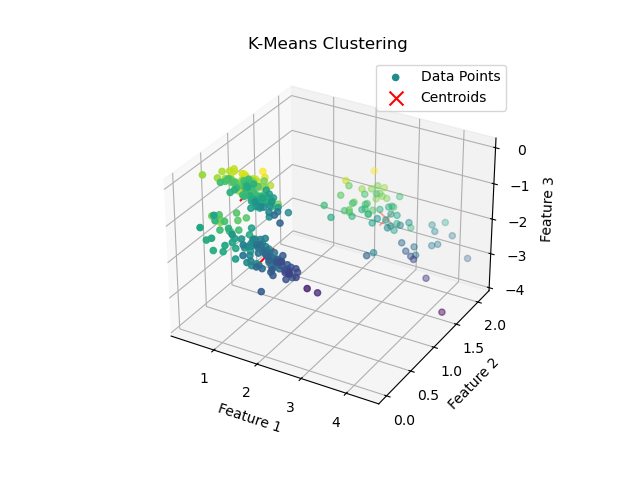

In [50]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming X contains your 4-dimensional data
# X = [[feature1_1, feature2_1, feature3_1, feature4_1],
#      [feature1_2, feature2_2, feature3_2, feature4_2],
#      ...
#      [feature1_n, feature2_n, feature3_n, feature4_n]]

# Step 2: Choose the number of clusters (k)
k = 3

# Step 3: Apply K-Means Algorithm
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

# Step 4: Fit the model
kmeans.fit(qoiX)

# Step 5: Cluster Assignment
labels = kmeans.labels_

# Step 6: Interpret Results
centroids = kmeans.cluster_centers_

# Analyze the clusters and visualize the results as needed


# Plotting the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(qoiX.iloc[:, 0], qoiX.iloc[:, 1], qoiX.iloc[:, 2], c=qoiX.iloc[:, 3], cmap='viridis', label='Data Points')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=100, c='red', label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering')

plt.legend()
plt.show()
